In [2]:
import pandas as pd
import keras
from keras import models, layers
from keras.preprocessing import image
import tensorflow as tf
import cv2
import numpy as np


In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
train_datagen = image.ImageDataGenerator(rescale = 1.0/255)
validation_datagen = image.ImageDataGenerator(rescale = 1.0/255)
test_datagen = image.ImageDataGenerator(rescale = 1.0/255)


In [6]:
batch_size = 32

In [8]:
train_generator = train_datagen.flow_from_directory('train', class_mode = 'sparse', batch_size = batch_size, target_size=(64,64))
validation_generator = train_datagen.flow_from_directory('validation', class_mode = 'sparse', batch_size = batch_size, target_size=(64,64))
test_generator = train_datagen.flow_from_directory('test', class_mode = 'sparse', batch_size = batch_size, target_size=(64,64))


Found 38640 images belonging to 1016 classes.
Found 13524 images belonging to 1016 classes.
Found 13524 images belonging to 1016 classes.


In [13]:
n_image_train = 38640
n_image_validation = 13524

### Build Model

In [14]:
import keras
from keras import models, layers

In [15]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (64, 64, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))

#model.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
#model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(1016, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

### Model encode

In [16]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['acc']
)

In [17]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        verbose=1
    )
]

In [18]:
nsteps_per_epoch = n_image_train//batch_size
nsteps_validation = n_image_validation//batch_size

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nsteps_per_epoch,
    epochs = 50,
    
    validation_data = validation_generator,
    validation_steps = nsteps_validation,
    callbacks=callbacks_list
)

Epoch 1/50
1207/1207 [==============================] - 165s 137ms/step - loss: 6.5945 - acc: 0.0038 - val_loss: 6.1139 - val_acc: 0.0098
Epoch 2/50
1207/1207 [==============================] - 60s 50ms/step - loss: 5.6663 - acc: 0.0269 - val_loss: 4.9894 - val_acc: 0.0622
Epoch 3/50
1207/1207 [==============================] - 59s 49ms/step - loss: 4.4063 - acc: 0.1152 - val_loss: 3.7224 - val_acc: 0.1919
Epoch 4/50
1207/1207 [==============================] - 59s 49ms/step - loss: 3.2794 - acc: 0.2575 - val_loss: 2.8945 - val_acc: 0.3232
Epoch 5/50
1207/1207 [==============================] - 70s 58ms/step - loss: 2.4348 - acc: 0.4006 - val_loss: 2.4050 - val_acc: 0.4159
Epoch 6/50
1207/1207 [==============================] - 72s 59ms/step - loss: 1.7953 - acc: 0.5306 - val_loss: 2.0668 - val_acc: 0.4816
Epoch 7/50
1207/1207 [==============================] - 75s 62ms/step - loss: 1.3737 - acc: 0.6245 - val_loss: 1.9656 - val_acc: 0.5201
Epoch 8/50
1207/1207 [========================

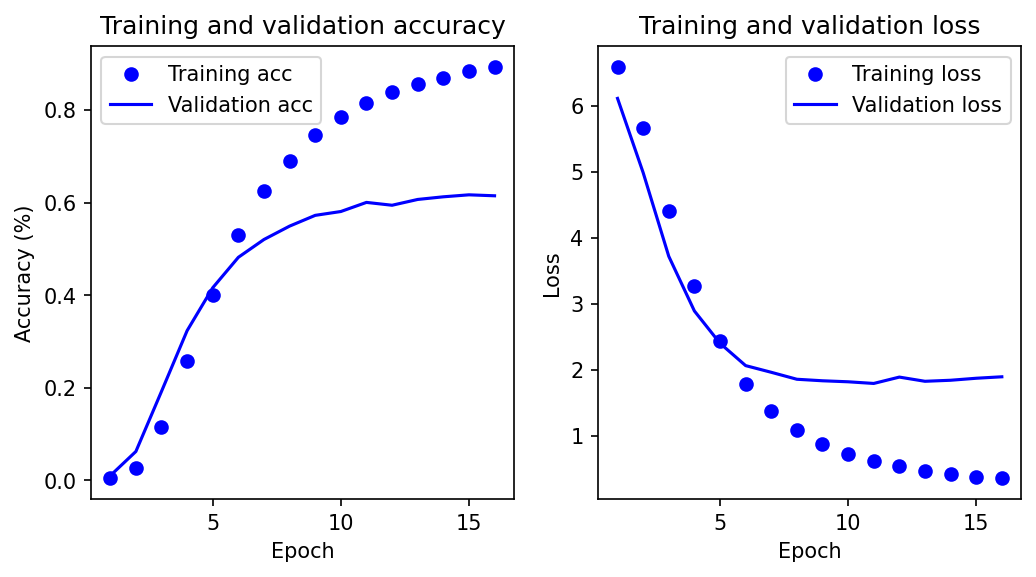

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
dict_history = dict(epochs=epochs, acc=acc, val_acc=val_acc, loss=loss, val_loss=val_loss)
df_history = pd.DataFrame(dict_history)
df_history.to_csv("df_history.csv")

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.set_dpi(150)

axes[0].plot(epochs, acc, 'bo', label='Training acc')
axes[0].plot(epochs, val_acc, 'b', label='Validation acc')
axes[0].set_title('Training and validation accuracy')
axes[0].set_ylabel("Accuracy (%)")

axes[1].plot(epochs, loss, 'bo', label='Training loss')
axes[1].plot(epochs, val_loss, 'b', label='Validation loss')
axes[1].set_title('Training and validation loss')
axes[1].set_ylabel("Loss")

for ax in axes:
    ax.set_xlabel('Epoch')
    ax.legend()

plt.show()

In [20]:
df_history

,epochs,acc,val_acc,loss,val_loss
0,1,0.003833,0.009849,6.594465,6.113948
1,2,0.026886,0.062204,5.666251,4.989416
2,3,0.115235,0.191943,4.406266,3.722360
3,4,0.257460,0.323164,3.279381,2.894509
4,5,0.400591,0.415877,2.434811,2.405030
5,6,0.530564,0.481635,1.795269,2.066769
6,7,0.624482,0.520142,1.373671,1.965589
7,8,0.690297,0.549022,1.098957,1.860149
8,9,0.746633,0.572275,0.877534,1.837115
9,10,0.784578,0.580569,0.732030,1.821782


In [31]:
model.save("jiaguwen_model.h5")

OSError: Unable to create file (unable to open file: name = '../input/jiaguwen/jiaguwen_model.h5', errno = 30, error message = 'Read-only file system', flags = 13, o_flags = 242)

In [22]:
test_loss, test_acc = model.evaluate_generator(test_generator, verbose=1, workers=2)

423/423 [==============================] - 59s 140ms/step - loss: 1.9030 - acc: 0.6110


In [23]:
test_acc

0.6109879016876221

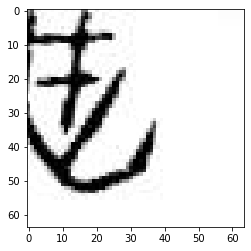

In [24]:
plt.imshow(test_generator[0][0][6])

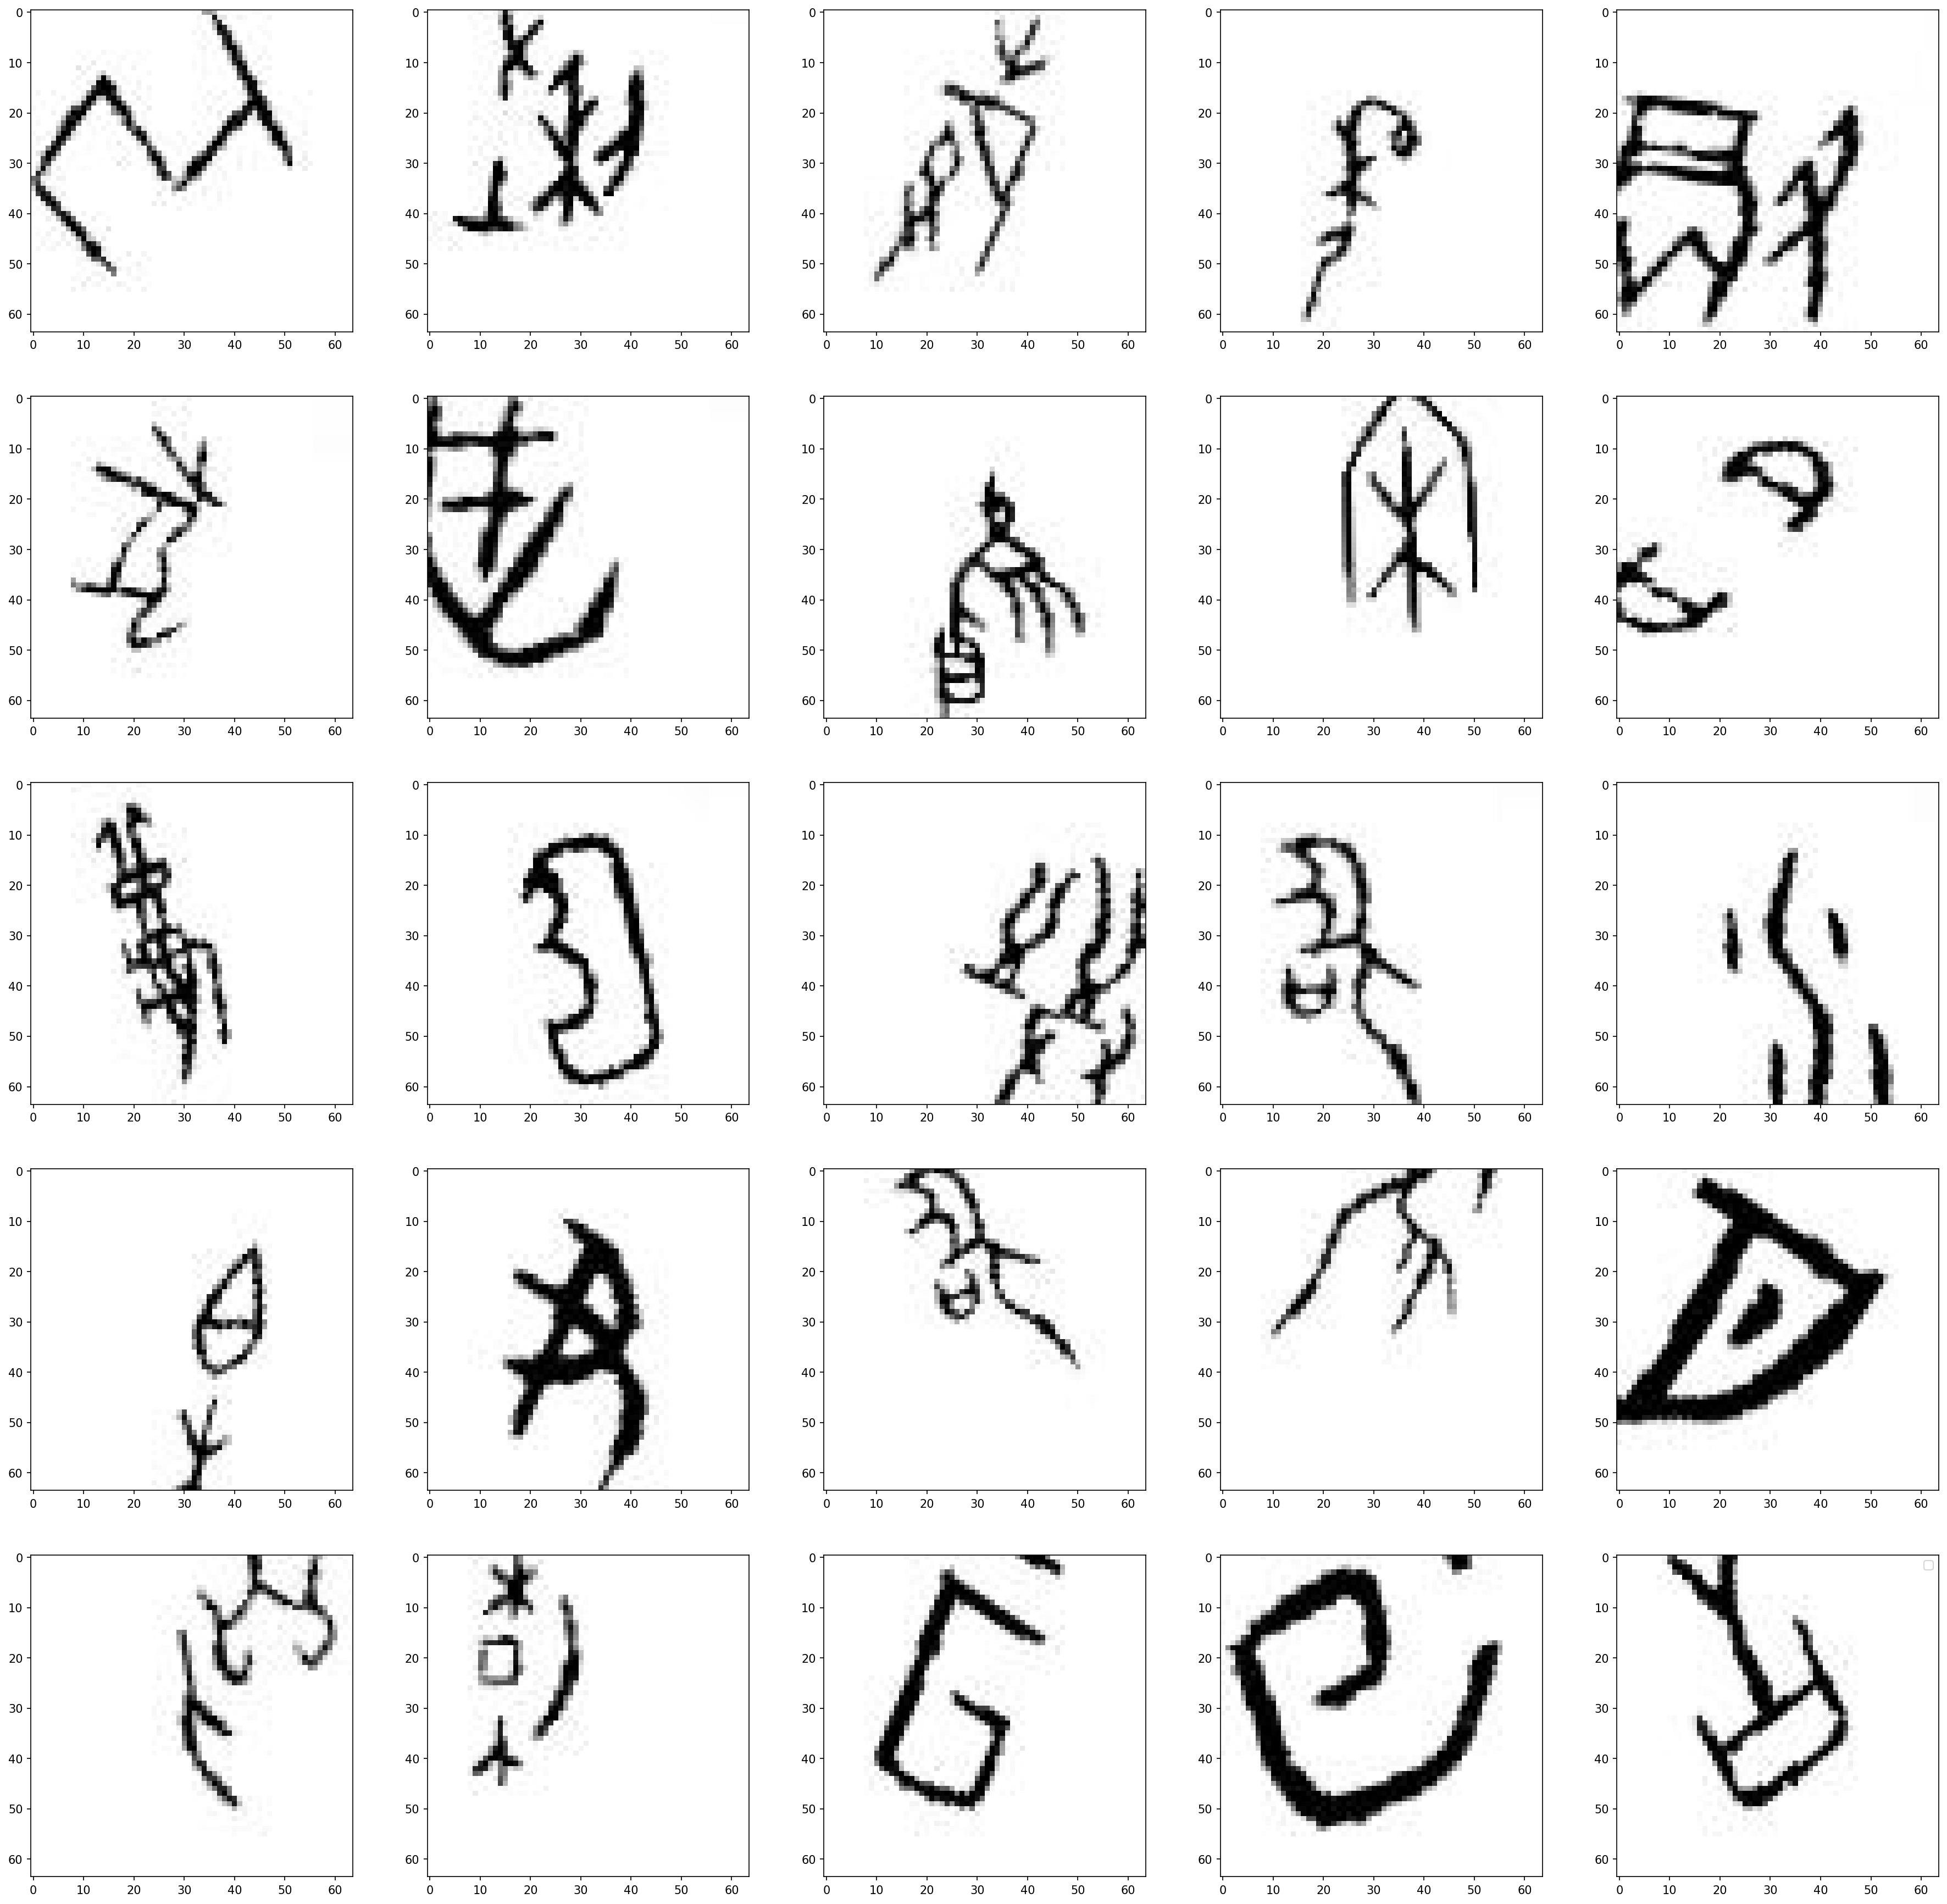

In [25]:
fig = plt.figure(figsize=(30, 30))
fig.set_dpi(150)
n_rows = 5
n_cols = 5

for i in range(0, n_rows*n_cols):
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    ax.imshow(test_generator[0][0][i], label=i)
    # ax.set_axis_off()

plt.legend()
plt.show()

In [26]:
model.predict_classes(test_generator[0][0])

array([371, 740, 718, 744, 228, 652, 214, 943, 321, 889, 735, 782,  40,
       248, 580, 541, 357, 929, 950, 504, 273, 523, 429,  48, 809, 331,
       981, 559, 105, 571, 911, 665])

In [27]:
test_generator[0][1]

array([371., 740., 720., 383., 625., 652.,  29., 943., 323., 202., 735.,
       782., 686., 248., 580., 541., 357., 248., 715., 517., 152., 502.,
        48.,  48., 809., 331., 922., 674., 105., 293., 911., 665.],
      dtype=float32)

In [1]:
new_model = tf.keras.models.load_model('/results/jiaguwen_model.h5')

NameError: name 'tf' is not defined